<a href="https://colab.research.google.com/github/sgroark/genAI/blob/main/genAIassign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Generative AI: Assignment 2**

**Sarah Groark**

Comparing a Multilayer Perceptron and a Convolutional Neural Network on the CIFAR-10 dataset.

In [ ]:
import numpy as np
from tensorflow.keras import layers, models, optimizers, utils, datasets
import matplotlib.pyplot as plt


In [29]:
#data preparation

#parameters
num_classes = 10

#preprocessing
(x_train, y_train),(x_test,y_test) = datasets.cifar10.load_data()

x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

#y_train = utils.to_categorical(y_train, num_classes)
#y_test = utils.to_categorical(y_test,num_classes)



**Multilayer Perceptron Model**

In [32]:
def create_mlp_model(input_shape):
  #create model
  model = models.Sequential([

      #input layer
      layers.Input(input_shape),

      #flatten input later
      layers.Flatten(input_shape=input_shape),

      #Hidden layer #1
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.3),

      #Hidden layer #2
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.3),

      #Output layer
      layers.Dense(10,activation='softmax'),

    ])

  model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [33]:
MLP_model = create_mlp_model((32,32,3))
fit = MLP_model.fit(x_train,y_train, epochs = 50, batch_size = 32, validation_split=0.2)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.1845 - loss: 2.1934 - val_accuracy: 0.3203 - val_loss: 1.8794
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.2622 - loss: 1.9679 - val_accuracy: 0.3319 - val_loss: 1.8667
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.2833 - loss: 1.9266 - val_accuracy: 0.3099 - val_loss: 1.8978
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.2927 - loss: 1.9135 - val_accuracy: 0.3452 - val_loss: 1.8466
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.2964 - loss: 1.8972 - val_accuracy: 0.3410 - val_loss: 1.8652
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.3023 - loss: 1.8854 - val_accuracy: 0.3559 - val_loss: 1.8336
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3086 - loss: 1.8850 - val_accuracy: 0.3617 - val_loss: 1.7949
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3069 -

In [34]:
MLP_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3891 - loss: 1.7265


[1.7284430265426636, 0.38350000977516174]

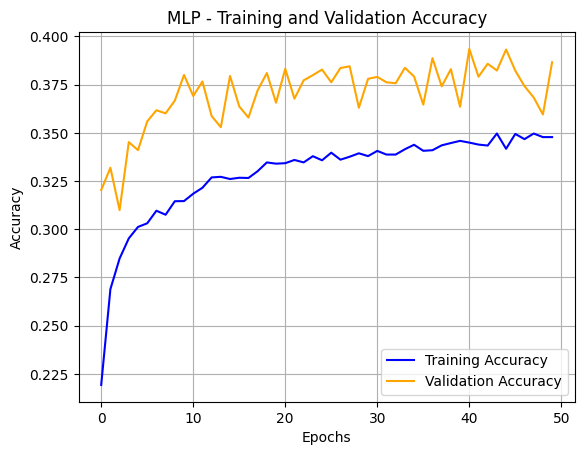

In [35]:
plt.plot(fit.history['accuracy'],label='Training Accuracy',color='blue')
plt.plot(fit.history['val_accuracy'],label="Validation Accuracy", color="orange")
plt.title('MLP - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

**Convolutional Neural Network**

In [ ]:
def create_cnn_model(input_shape):

  #create model
  model = models.Sequential([

      #first convolutional layer
      layers.Conv2D(filters=32, kernel_size = 3, strides = 1, padding = "same",input_shape=input_shape),
      layers.BatchNormalization(),
      layers.LeakyReLU(),

      #second convolutional layer
      layers.Conv2D(filters=32, kernel_size = 3, strides=2, padding="same"),
      layers.BatchNormalization(),
      layers.LeakyReLU(),

      #third convolutional layer
      layers.Conv2D(filters=64,kernel_size=3,strides=1, padding = "same"),
      layers.BatchNormalization(),
      layers.LeakyReLU(),

      #fourth convolutional layer
      layers.Conv2D(filters=64,kernel_size=3,strides=2, padding = "same"),
      layers.BatchNormalization(),
      layers.LeakyReLU(),

      #flatten layer
      layers.Flatten(),

      #dense layer
      layers.Dense(128,activation='relu'),
      layers.BatchNormalization(),
      layers.LeakyReLU(),
      layers.Dropout(0.5),

      #output layer
      layers.Dense(10,activation='softmax')

  ])

  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model


In [ ]:
#create instance of the model with input (32,32,3)
CNN_model = create_cnn_model(input_shape=(32,32,3))

#fit the model
CNN_fit = CNN_model.fit(x_train,y_train,validation_split=0.2,epochs=10,batch_size=32)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 195s 105ms/step - accuracy: 0.3694 - loss: 1.8812 - val_accuracy: 0.4761 - val_loss: 1.5466
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 129s 103ms/step - accuracy: 0.5649 - loss: 1.2268 - val_accuracy: 0.6252 - val_loss: 1.0605
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 146s 107ms/step - accuracy: 0.6345 - loss: 1.0502 - val_accuracy: 0.5516 - val_loss: 1.3703
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 104ms/step - accuracy: 0.6651 - loss: 0.9560 - val_accuracy: 0.6939 - val_loss: 0.8823
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 135s 98ms/step - accuracy: 0.6962 - loss: 0.8700 - val_accuracy: 0.6359 - val_loss: 1.0645
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 99ms/step - accuracy: 0.7164 - loss: 0.8127 - val_accuracy: 0.6894 - val_loss: 0.8855
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 98ms/step - accuracy: 0.7262 - loss: 0.7741 - val_accuracy: 0.7060 - val_loss: 0.8365
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 98ms/step - accura

In [ ]:
#evaluate the model - note accuracy & loss values
CNN_model.evaluate(x_test,y_test,batch_size=1000)

10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 812ms/step - accuracy: 0.6987 - loss: 0.8677


[0.8752208948135376, 0.6980999708175659]

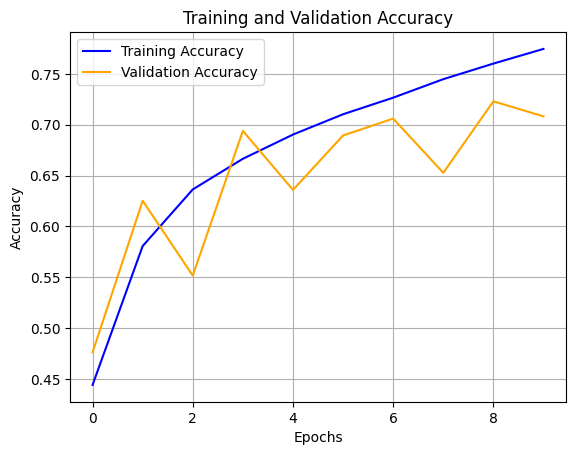

In [ ]:
#plot the training & validation accuracies over the course of the epochs

plt.plot(CNN_fit.history['accuracy'],label='Training Accuracy',color='blue')
plt.plot(CNN_fit.history['val_accuracy'],label="Validation Accuracy", color="orange")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()